# **Notes**

+ Info about rat positions on the video and recording channels
    
    <br>
    <br>
+ Remarque on precising path to package: <br>
    + *vpp* contains 2 packages: *video_processing* & *utils*. <br>
    + In this notebook we will use functions form modules in *utils*. To import these modules we need to add path to *vpp* folder to th paths where python will look for imports.
    + It is possible to verify that folder we need is within the considered paths with **sys.path** command

In [1]:
import os
import sys
import glob
sys.path.append(os.path.join(os.getcwd(),"vpp"))

In [4]:
from utils import plot_mvm, mvm2txt, chopOffTail, rescalingNOF, syncFileCreator, plot_mvm_rescaled

# **RAT ? a.k.a. W596**

In [8]:
import os, re, shutil, glob
def rat_folder_creator(path, output_folder="/media/data-119/Matthias_mvm/", rat_name = "596"):
    """
    path: path 2 video
    output_folder: parent folder for session-folders
    
    Creates a folders named {rat_name}+{date}. Date is extracted from the name of video. 
    Creates a simlink to video in the new folder. 
    """

    # extract name of the video
    try:
        found = re.search('Basler_(.+?).mp4', path).group(1)
    except AttributeError:
        # AAA, ZZZ not found in the original string
        found = ''  # apply your error handling------------------------

    try:
        date = re.search('__[0-9]+__(.+?)[0-9]{3}.mp4', path).group(1)
    except AttributeError:
        # AAA, ZZZ not found in the original string
        date = ''  # apply your error handling------------------------

    #name for the new folder
    new_name = "Rat"+rat_name+"_"+date
    path2newFolder = os.path.join(output_folder,new_name)
    
    #print(os.path.join(path2newFolder, os.path.split(path)[1]))
    
    # check whether the folder with session exists, if not create it
    if not os.path.isdir(path2newFolder):
        os.mkdir(path2newFolder)
    else:
        shutil.rmtree(path2newFolder)
        os.mkdir(path2newFolder)

    # symlink the video to new folder
    os.symlink(src=path, dst=os.path.join(path2newFolder, os.path.split(path)[1]))

# OLD
------------------------------------------

In [3]:
w628 = "/media/data-119/Rat628-20210714_1/"

## session 1 of 14th of July

Index(['frame_nb', 'millisec', 'mvm_rat1', 'mvm_rat2', 'mvmr1_normalized',
       'mvmr2_normalized'],
      dtype='object')


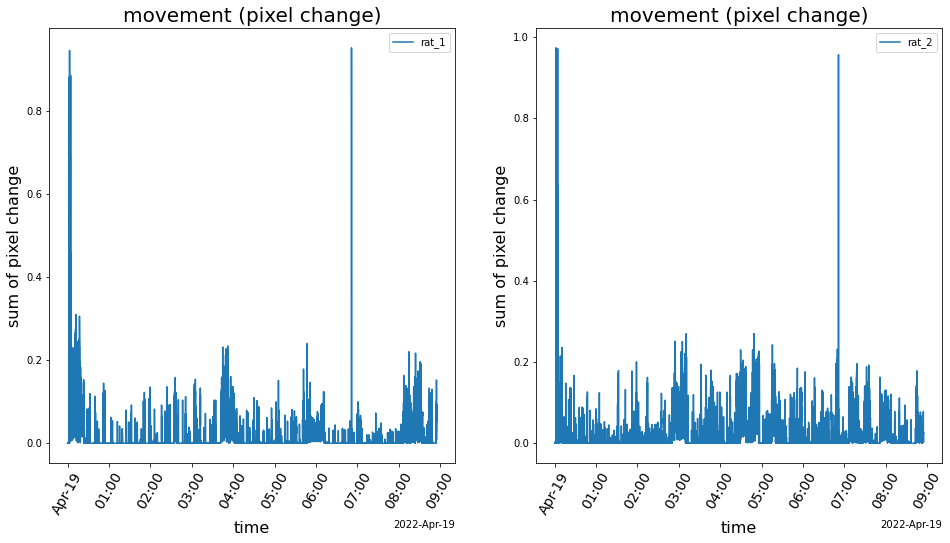

In [14]:
plot_mvm(path = os.path.join(w628, "acA1300-60gmNIR__21471690__20210714_122428913.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all =True,
             start={"hours": 2, "minutes": 0, "seconds": 0},
             dt={"hours": 1, "minutes": 0, "seconds": 0},
             ylim=1,
             save=False)

### Create sync file

In [5]:
# Input : path to FOLDERS
# you can find this info in /media/data-116/Neuropixels Info/Neuropixel_Rats.ods

syncFileCreator(TTL2_folder = "/media/data-102/2021-07-14_12-24-22/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-14_12-24-22/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

Video was recorded from second 6.0336.


### Saving movement var in txt file
+ and calculate how much to crop from video signal in the end if the ephys was stopped first (before camera)

In [9]:
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

Video duration: 32095.36
Sum of diffs: 32095.655600000002.
Video signal is -0.2956000000012864 seconds longer than sync_file, which corresponds to -7 number of frames


## **This recording is weird** 
- on LFP (.dat) file, the recording lasts 32137.5 sec, which is 36 longer than video duration : 32095 (AND SUM OF DIFFERENCES on TTL : 32905) - even when the beginning of signal, when the video wasn't recording is substracted (6 secs). 

## May have to 'cut' the end of LFP. (not consider it)!

### Rescaling number of frames

In [11]:
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

202 frames were deleted.


### Plotting rescaled movement
+ check with video wether it is well synchronized

0.3902598391730994


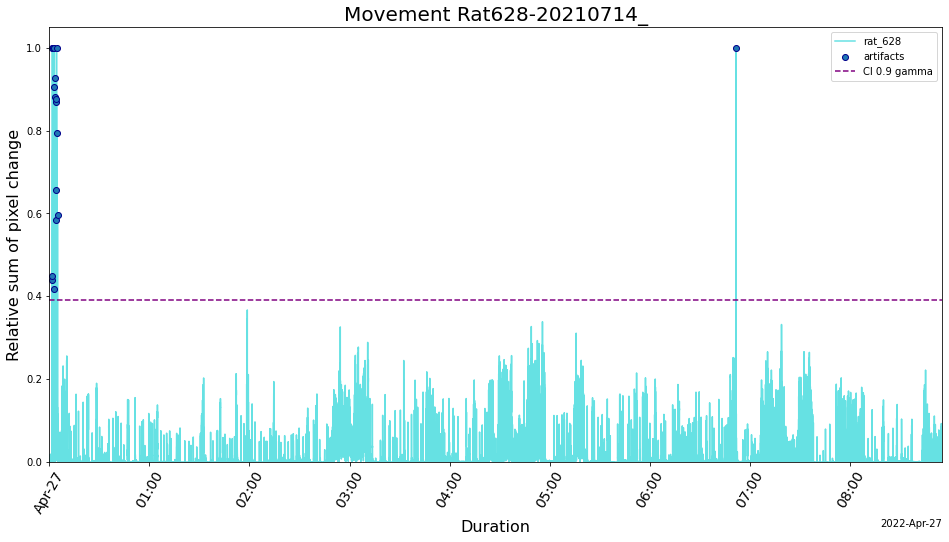

In [6]:
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.9)

## session 3 of 14th of July 

+ session 2 is a short + empty ttl

In [19]:
w628 = "/media/data-119/Rat628-20210714_2/"

Index(['frame_nb', 'millisec', 'mvm_rat1', 'mvm_rat2', 'mvmr1_normalized',
       'mvmr2_normalized'],
      dtype='object')


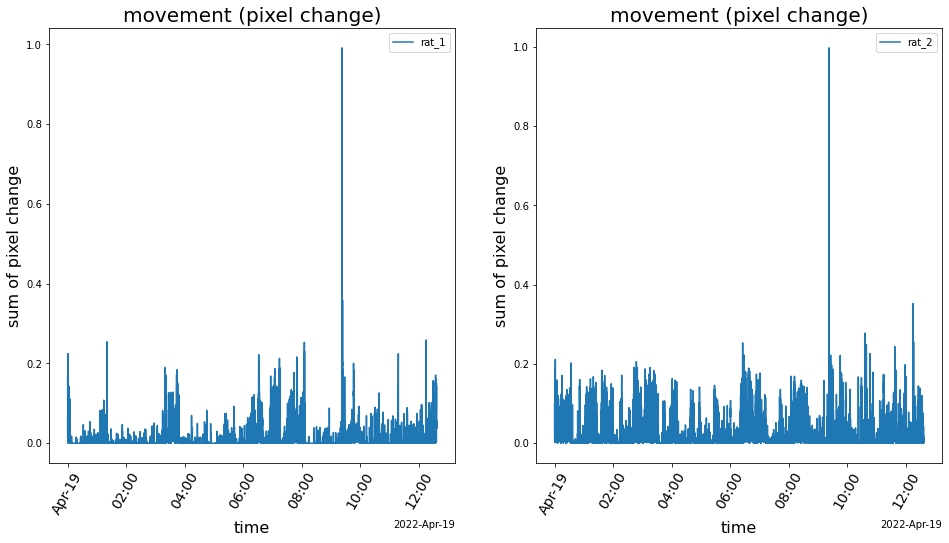

In [19]:
plot_mvm(path = os.path.join(w628, "acA1300-60gmNIR__21471690__20210714_212500309.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all = True,
             start={"hours": 2, "minutes": 0, "seconds": 0},
             dt={"hours": 1, "minutes": 0, "seconds": 0},
             ylim=1,
             save=False)

### Saving movement var in txt file

In [13]:
# Input : path to FOLDERS
# you can find this info in /media/data-116/Neuropixels Info/Neuropixel_Rats.ods

syncFileCreator(TTL2_folder = "/media/data-102/2021-07-14_21-24-12/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-14_21-24-12/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

Video was recorded from second 47.5092.


In [14]:
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

Video duration: 45407.28
Sum of diffs: 45395.686.
Video signal is 11.593999999997322 seconds longer than sync_file, which corresponds to 289 number of frames


### Rescaling number of frames

In [15]:
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

298 frames were deleted.


0.8309591464799309


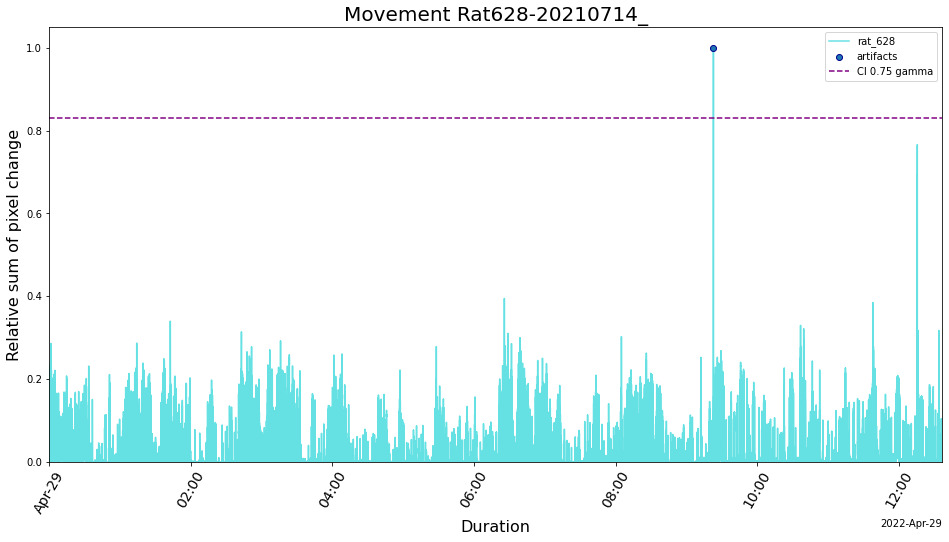

In [21]:
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.75)

## session 2 (1 is broken) of 15th of July

+ on the right => rat 2

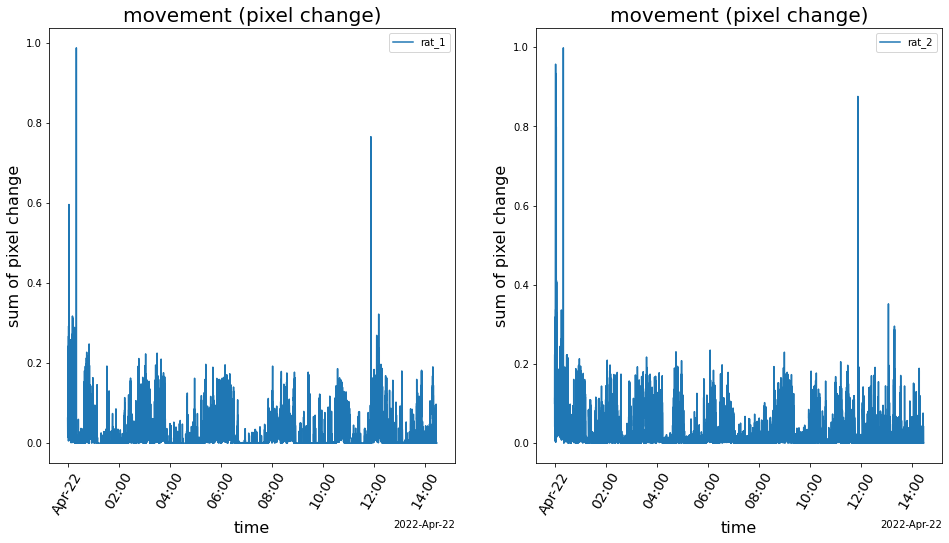

In [11]:
plot_mvm(path = os.path.join(w628_15, "acA1300-60gmNIR__21471690__20210715_185541853.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all = True,
             start={"hours": 1, "minutes": 25, "seconds": 0},
             dt={"hours": 0, "minutes": 10, "seconds": 0},
             ylim=1,
             save=False)

Video was recorded from second 2.8612.
Video duration: 51989.44
Sum of diffs: 51989.4304.
Video signal is 0.00960000000486616 seconds longer than sync_file, which corresponds to 0 number of frames
341 frames were deleted.
0.4553858218162495


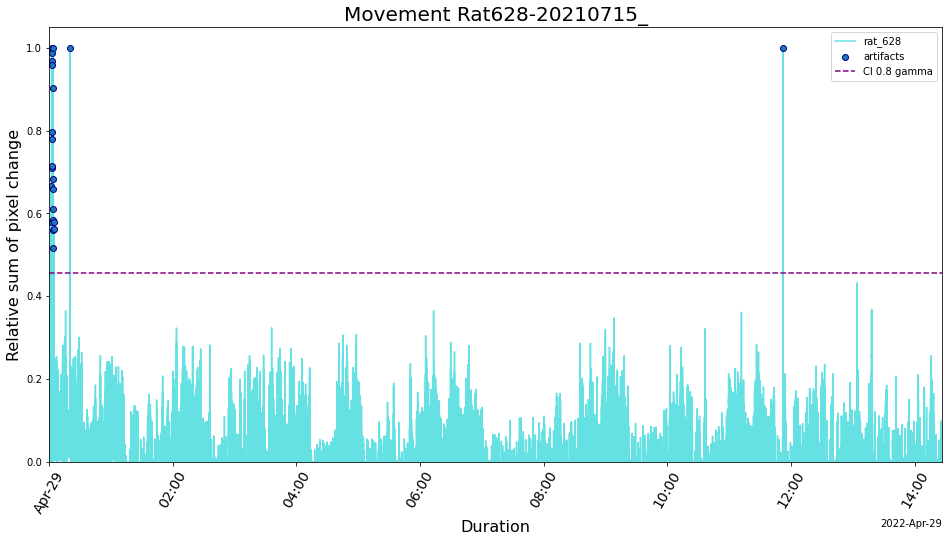

In [22]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210715_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.8)

## session 1 of 16th of July


In [25]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210716_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_10-24-13/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_10-24-13/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

0.5025173501127472


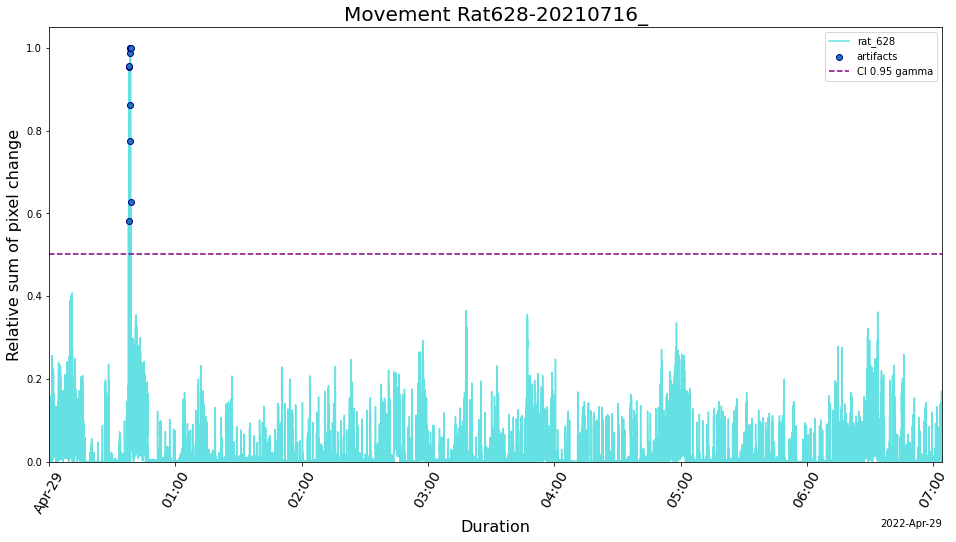

In [26]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.95)

## session 2 of 16th of July


In [27]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210716_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

0.465342271420893


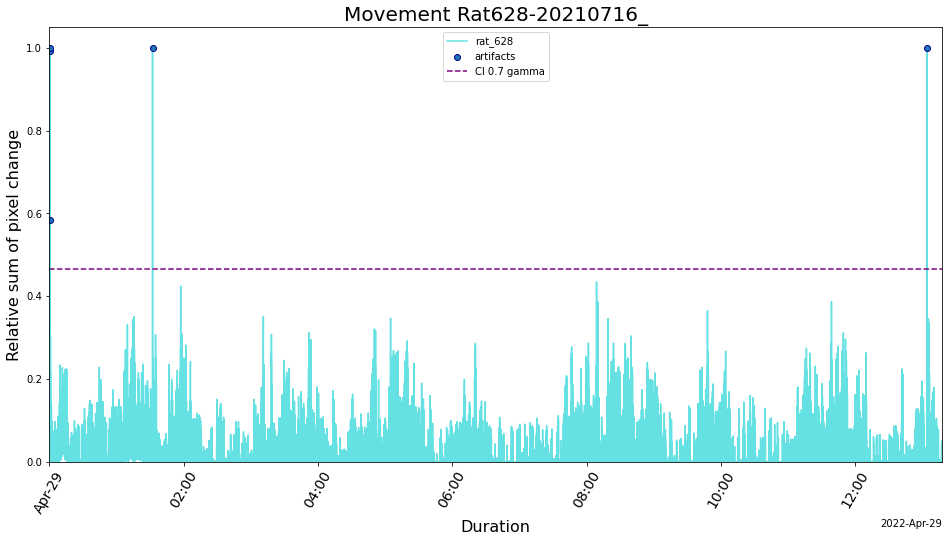

In [29]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.70)

## session 1 of 17th of July


In [30]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210717_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

1.1994007632738455


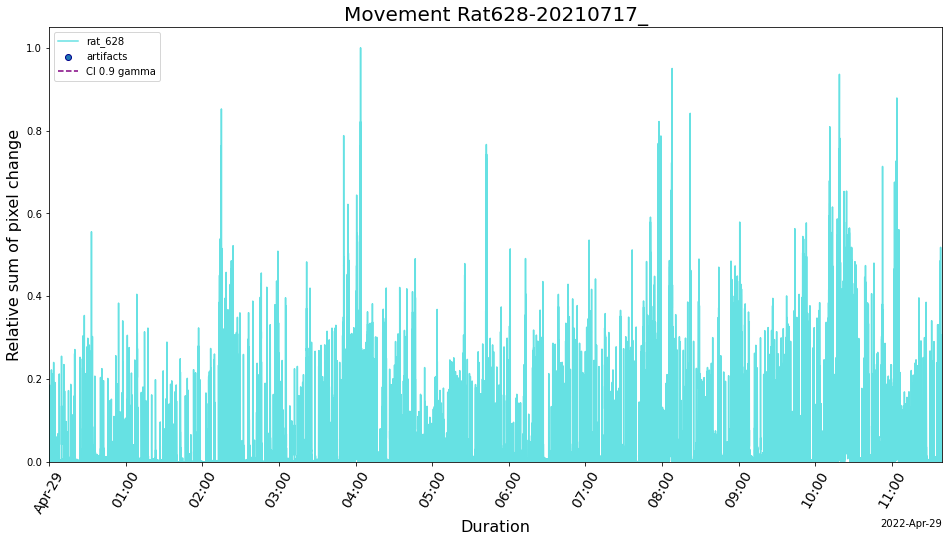

In [31]:
# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 17th of July

Video was recorded from second 3.1684.
Video duration: 46712.24
Sum of diffs: 46712.326799999995.
Video signal is -0.0867999999973108 seconds longer than sync_file, which corresponds to -2 number of frames
310 frames were deleted.
1.4282703018212817


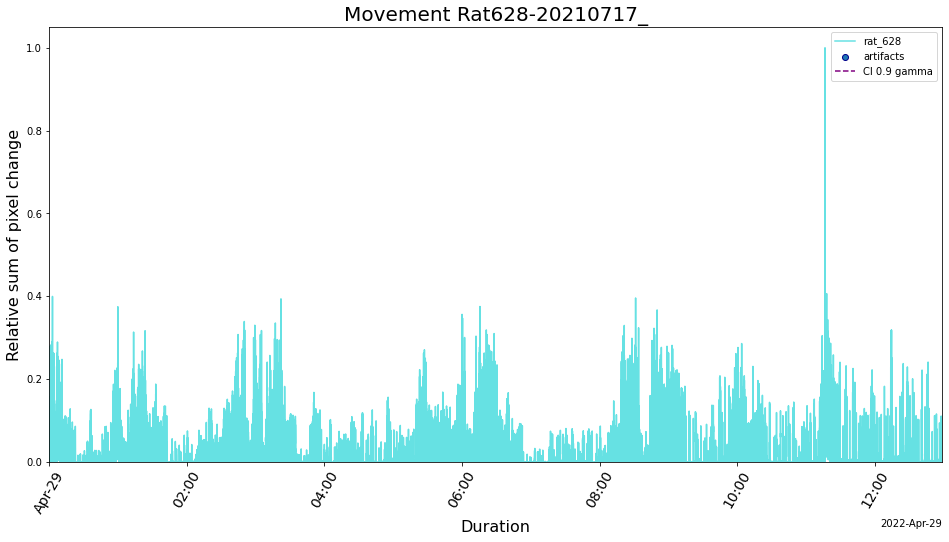

In [32]:
# ASSIGN SESSION FOLDER
w628 = "/media/data-119/Rat628-20210717_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.1/TTL_2/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.1/",
            output_sync_txt = w628)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w628+"*.csv")[0],
        path2vid = glob.glob(w628+"*.mp4")[0],
        path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
        rat=2)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w628+"*_sec.txt")[0],
             path2mvm = glob.glob(w628+"*mvm.txt")[0],
             path2duration = glob.glob(w628+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w628+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w628+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)